<a href="https://colab.research.google.com/github/ivansirait/Analisis_kebiasaan_saat_belajar_vs_Prestasi_Akademik-Siswa/blob/Try-before-Main/DasiDalis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files


uploaded = files.upload()

# Ambil nama file
filename = list(uploaded.keys())[0]

# Membaca file Excel
df = pd.read_excel(filename)

print("Missing values awal:")
print(df.isnull().sum())

df.info()


In [ ]:
print("Missing values awal:")
print(df.isnull().sum())
print("Nama nama duplikat ada : ",df["Nama Lengkap"].duplicated().sum())
df = df.drop_duplicates(subset="Nama Lengkap", keep="first")
print("Jumlah nama duplikat di akhir:",df["Nama Lengkap"].duplicated().sum())
df.info()

In [ ]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

typeint = [
    "Mood Saat Belajar",
    "Pikiran atau Stres Akademik",
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in typeint:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

perilaku = ["Mood Saat Belajar", "Pikiran atau Stres Akademik"]
for col in perilaku:
    if col in df.columns:
        df[col] = df[col].fillna(3).astype("int64")

prestasi = [
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in prestasi:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype("int64")

if "Nilai rata-rata (Terakhir)" in df.columns:
    df["Nilai rata-rata (Terakhir)"] = (
        df["Nilai rata-rata (Terakhir)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
    )
    df = df.dropna(subset=["Nilai rata-rata (Terakhir)"])

cols_teks = [
    "Catatan singkat tentang Belajar",
    "Prestasi yang diraih didalam sekolah",
    "Prestasi yang diraih diluar sekolah"
]

cols_teks_ada = [c for c in cols_teks if c in df.columns]
if cols_teks_ada:
    df[cols_teks_ada] = df[cols_teks_ada].fillna("Tidak Ada")

print(df.isnull().sum())
df.info()

Timestamp                                                        0
Nama Lengkap                                                     0
Jenis Kelamin                                                    0
Jenis Sekolah Menengah atas yang anda tempuh                     0
Asal Sekolah                                                     0
Tingkat Kelas                                                    0
Gaya belajar yang biasanya digunakan                             0
Teknik belajar yang biasanya digunakan                           0
Apakah kamu belajar sendiri atau dengan bantuan orang lain?      0
Lokasi Belajar                                                   0
Jam Belajar                                                      0
Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari           0
Total Waktu untuk Belajar Mandiri /Hari                          0
Catatan singkat tentang Belajar                                  0
Mood Saat Belajar                                             

In [ ]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

typeint = [
    "Mood Saat Belajar",
    "Pikiran atau Stres Akademik",
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in typeint:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

perilaku = ["Mood Saat Belajar", "Pikiran atau Stres Akademik"]
for col in perilaku:
    if col in df.columns:
        df[col] = df[col].fillna(3).astype("int64")

prestasi = [
    "Jumlah prestasi di dalam sekolah",
    "Jumlah prestasi di luar sekolah"
]

for col in prestasi:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype("int64")

if "Nilai rata-rata (Terakhir)" in df.columns:
    df["Nilai rata-rata (Terakhir)"] = (
        df["Nilai rata-rata (Terakhir)"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
    )
    df = df.dropna(subset=["Nilai rata-rata (Terakhir)"])

cols_teks = [
    "Catatan singkat tentang Belajar",
    "Prestasi yang diraih didalam sekolah",
    "Prestasi yang diraih diluar sekolah"
]

cols_teks_ada = [c for c in cols_teks if c in df.columns]
if cols_teks_ada:
    df[cols_teks_ada] = df[cols_teks_ada].fillna("Tidak Ada")

print(df.isnull().sum())
df.info()

Timestamp                                                       0
Nama Lengkap                                                    0
Jenis Kelamin                                                   0
Jenis Sekolah Menengah atas yang anda tempuh                    0
Asal Sekolah                                                    0
Tingkat Kelas                                                   0
Gaya belajar yang biasanya digunakan                            0
Teknik belajar yang biasanya digunakan                          0
Apakah kamu belajar sendiri atau dengan bantuan orang lain?     0
Lokasi Belajar                                                  0
Jam Belajar                                                     0
Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari          0
Total Waktu untuk Belajar Mandiri /Hari                         0
Catatan singkat tentang Belajar                                 0
Mood Saat Belajar                                               0
Pikiran at

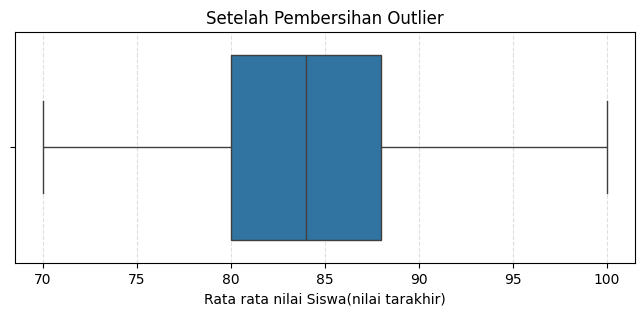

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas if you haven't already

# --- Step 1: Data Type Conversion ---
# The original column name is used for the conversion
col_to_clean = 'Rata rata nilai Siswa(nilai tarakhir)'

# Convert the column to numeric. Non-convertible values become NaN.
df[col_to_clean] = pd.to_numeric(df[col_to_clean], errors='coerce')

# --- Step 2: Handle Missing Values (NaN) ---
# Since we introduced NaNs, it's best to remove them before calculating quartiles.
# You can choose to drop them, fill them, or calculate quantiles while ignoring them.
# Dropping them is the simplest way to proceed with outlier removal.
df = df.dropna(subset=[col_to_clean])

# --- Step 3: Outlier Removal (Your Original Function) ---

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numeric_cols = [col_to_clean]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

# --- Step 4: Plotting (Your Original Plotting Code) ---
plt.figure(figsize=(8, 3))
sns.boxplot(x=df[col_to_clean])
plt.title("Setelah Pembersihan Outlier")
# Use the correct column name from the data for the plot label if possible,
# or ensure the label is correct.
plt.xlabel(col_to_clean)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

In [ ]:
print(df.columns)

Index(['Timestamp', 'Nama Lengkap', 'Jenis Kelamin',
       'Jenis Sekolah Menengah atas yang anda tempuh', 'Asal Sekolah',
       'Tingkat Kelas', 'Gaya belajar yang biasanya digunakan',
       'Teknik belajar yang biasanya digunakan',
       'Apakah kamu belajar sendiri atau dengan bantuan orang lain? ',
       'Lokasi Belajar', 'Jam Belajar',
       'Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari',
       'Total Waktu untuk Belajar Mandiri /Hari',
       'Catatan singkat tentang Belajar', 'Mood Saat Belajar',
       'Pikiran atau Stres Akademik', 'Rata rata nilai Siswa(nilai tarakhir)',
       'Apakah Anda pernah meraih prestasi di dalam atau luar sekolah',
       'Jumlah prestasi di dalam sekolah *',
       'Prestasi yang diraih didalam sekolah',
       'Jumlah prestasi di luar sekolah ',
       'Prestasi yang diraih diluar sekolah'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

hapus_kolom = [
    "Nama Lengkap",
    "Catatan singkat tentang Belajar",
    "Prestasi yang diraih didalam sekolah",
    "Prestasi yang diraih diluar sekolah"
]
df = df.drop(columns=hapus_kolom, errors="ignore")

df["Gaya belajar yang biasanya digunakan"] = (
    df["Gaya belajar yang biasanya digunakan"]
    .astype(str)
    .str.lower()
    .str.strip()
    .replace({
        "visual (belajar lebih efektif melalui gambar, warna, diagram, grafik, dan tampilan visual.)": "visual",
        "auditory (belajar paling efektif melalui mendengar, berbicara, diskusi, dan penjelasan verbal.)": "auditory",
        "kinestetik (belajar lebih efektif lewat gerakan fisik, praktik langsung, eksperimen, atau simulasi.)": "kinestetik",
        "nan": None
    })
)

df = df.dropna(subset=["Gaya belajar yang biasanya digunakan"])

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.lower().str.strip()

ordinal_cols = {
    "Tingkat Kelas": ["x", "xi", "xii"],
    "Gaya belajar yang biasanya digunakan": ["visual", "auditory", "kinestetik"],
    "Jam Belajar": ["pagi", "siang", "malam"],
    "Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari":
        ["< 15 menit", "15 - 30 menit", "30 - 60 menit", ">60 menit"],
    "Total Waktu untuk Belajar Mandiri /Hari":
        ["< 15 menit", "15 - 30 menit", "30 - 60 menit", ">60 menit"],
}

for col, urutan in ordinal_cols.items():
    if col in df.columns:
        encoder = OrdinalEncoder(
            categories=[urutan],
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
        df[[col]] = encoder.fit_transform(df[[col]])

nominal_cols = [
    "Jenis Kelamin",
    "Jenis Sekolah Menengah atas yang anda tempuh",
    "Apakah kamu belajar sendiri atau dengan bantuan orang lain?",
    "Lokasi Belajar",
    "Pernah meraih prestasi di dalam atau luar sekolah"
]

df = pd.get_dummies(
    df,
    columns=[c for c in nominal_cols if c in df.columns],
    drop_first=True
)
df.info()
df.head()

ValueError: could not convert string to float: 'x'

In [ ]:
print(df.columns)


Index(['Timestamp', 'Asal Sekolah', 'Tingkat Kelas',
       'Gaya belajar yang biasanya digunakan',
       'Teknik belajar yang biasanya digunakan',
       'Apakah kamu belajar sendiri atau dengan bantuan orang lain? ',
       'Jam Belajar', 'Total Waktu untuk mengerjakan Pekerjaan Rumah(PR)/Hari',
       'Total Waktu untuk Belajar Mandiri /Hari', 'Mood Saat Belajar',
       'Pikiran atau Stres Akademik', 'Rata rata nilai Siswa(nilai tarakhir)',
       'Apakah Anda pernah meraih prestasi di dalam atau luar sekolah',
       'Jumlah prestasi di dalam sekolah *',
       'Jumlah prestasi di luar sekolah ', 'Jenis Kelamin_perempuan',
       'Jenis Sekolah Menengah atas yang anda tempuh_sma',
       'Jenis Sekolah Menengah atas yang anda tempuh_smk',
       'Lokasi Belajar_bmc',
       'Lokasi Belajar_di bengkel saudara atau rumah teman',
       'Lokasi Belajar_di kelas', 'Lokasi Belajar_di ruangan kelas',
       'Lokasi Belajar_di ruangan kls', 'Lokasi Belajar_di rumah',
       'Lokasi Bela

In [ ]:

# 2. Rename Kolom (Opsional tapi disarankan untuk mempermudah coding)
# Kita akan menyederhanakan nama kolom utama yang akan dianalisis
df.rename(columns={
    'Jenis Sekolah Menengah atas yang anda tempuh': 'Jenis_Sekolah',
    'Gaya belajar yang biasanya digunakan': 'Gaya_Belajar',
    'Rata rata nilai Siswa(nilai tarakhir)': 'Nilai_Rata_Rata',
    'Total Waktu untuk Belajar Mandiri /Hari': 'Waktu_Belajar_Mandiri',
    'Pikiran atau Stres Akademik': 'Stres_Akademik',
    'Jenis Kelamin': 'Jenis_Kelamin'
}, inplace=True)

print("\n--- Ringkasan Statistik Nilai Rata-Rata ---")
print(df['Nilai rata-rata (Terakhir)'].describe())

✅ Data Bersih dan Nama Kolom Siap untuk Analisis.


/tmp/ipython-input-1380010617.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gaya_Belajar', y='Nilai rata-rata (Terakhir)', data=df, palette='viridis')


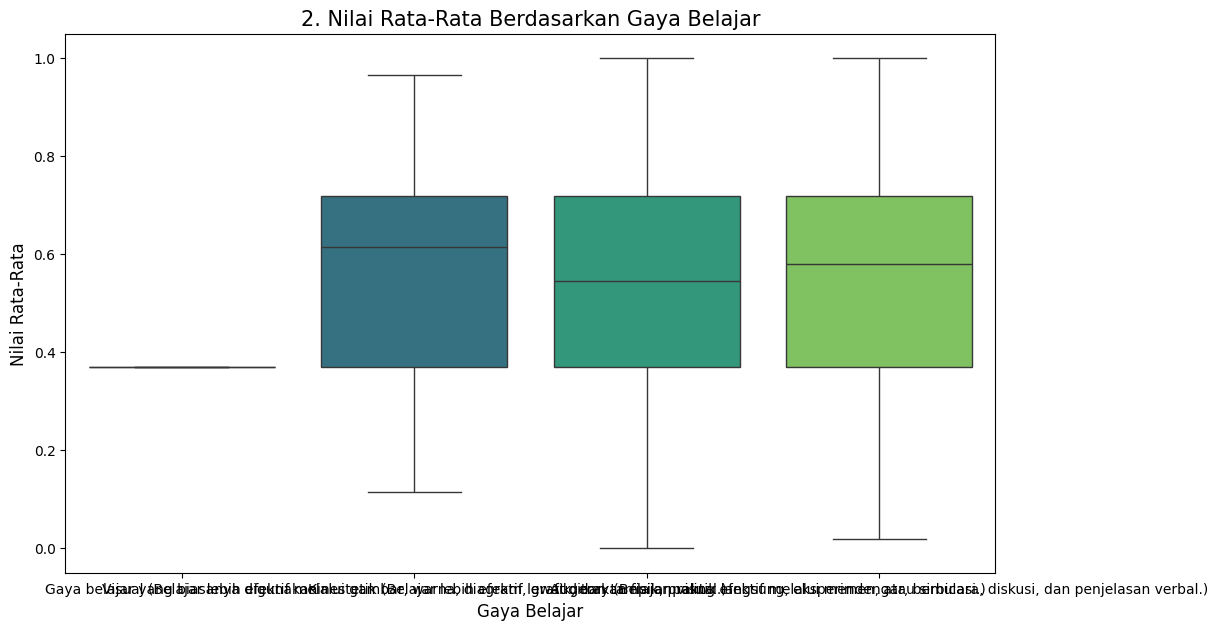


--- Rata-Rata Nilai per Gaya Belajar ---
Gaya_Belajar
Visual (Belajar lebih efektif melalui gambar, warna, diagram, grafik, dan tampilan visual.)             0.587494
Kinestetik (Belajar lebih efektif lewat gerakan fisik, praktik langsung, eksperimen, atau simulasi.)    0.561823
Auditory (Belajar paling efektif melalui mendengar, berbicara, diskusi, dan penjelasan verbal.)         0.557913
Gaya belajar yang biasanya digunakan                                                                    0.369085
Name: Nilai rata-rata (Terakhir), dtype: float64
💡 Insight B: Menentukan gaya belajar mana yang berkorelasi dengan nilai tertinggi (fokus pada median dan outliers).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Rename Kolom untuk Analisis dan Plotting (mempermudah penulisan kode)
df.rename(columns={
    'Rata - rata nilai siswa': 'Nilai_Rata_Rata',
    'Jam Belajar Siswa per Hari': 'Waktu_Belajar_Harian',
    'Gaya belajar yang biasanya digunakan': 'Gaya_Belajar',
    'Stress Akademik': 'Stres_Akademik',
    'Tingkat Kelas': 'Tingkat_Kelas',
    'Jenis Sekolah Menengah atas yang anda tempuh': 'Jenis_Sekolah',
    'Pernah meraih prestasi?': 'Pernah_Prestasi'
}, inplace=True)

print("✅ Data Bersih dan Nama Kolom Siap untuk Analisis.")

# --- Visualisasi Utama untuk Insight ---
# B. Perbandingan Nilai Rata-Rata Berdasarkan Gaya Belajar
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gaya_Belajar', y='Nilai rata-rata (Terakhir)', data=df, palette='viridis')
plt.title('2. Nilai Rata-Rata Berdasarkan Gaya Belajar', fontsize=15)
plt.xlabel('Gaya Belajar', fontsize=12)
plt.ylabel('Nilai Rata-Rata', fontsize=12)
plt.show()

avg_nilai_gaya = df.groupby('Gaya_Belajar')['Nilai rata-rata (Terakhir)'].mean().sort_values(ascending=False)
print("\n--- Rata-Rata Nilai per Gaya Belajar ---")
print(avg_nilai_gaya)
print("💡 Insight B: Menentukan gaya belajar mana yang berkorelasi dengan nilai tertinggi (fokus pada median dan outliers).")


/tmp/ipython-input-2871383151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')


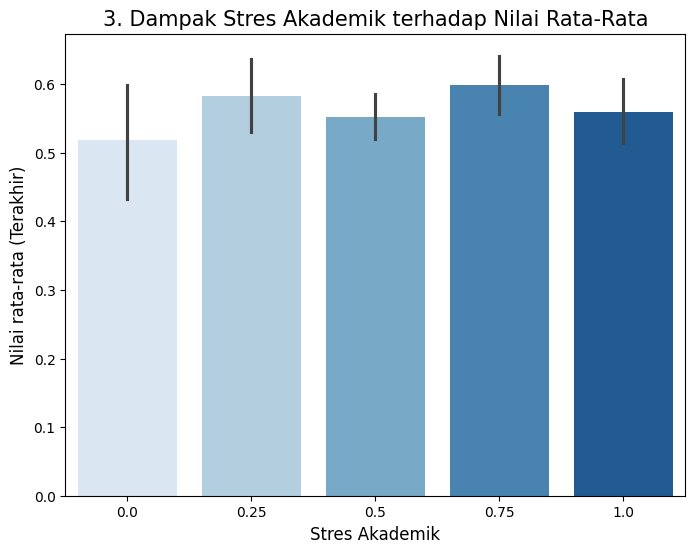


--- Rata-Rata Nilai per Tingkat Stres ---
Stres_Akademik
0.75    0.598495
0.25    0.581933
1.00    0.559098
0.50    0.552472
0.00    0.517766
Name: Nilai rata-rata (Terakhir), dtype: float64
💡 Insight C: Melihat apakah tingkat stres (Tinggi/Sedang/Rendah) memengaruhi performa secara signifikan.


In [ ]:
# C. Dampak Stres Akademik terhadap Nilai Rata-Rata
plt.figure(figsize=(8, 6))
sns.barplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')
plt.title('3. Dampak Stres Akademik terhadap Nilai Rata-Rata', fontsize=15)
plt.xlabel('Stres Akademik', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)
plt.show()

avg_nilai_stres = df.groupby('Stres_Akademik')['Nilai rata-rata (Terakhir)'].mean().sort_values(ascending=False)
print("\n--- Rata-Rata Nilai per Tingkat Stres ---")
print(avg_nilai_stres)
print("💡 Insight C: Melihat apakah tingkat stres (Tinggi/Sedang/Rendah) memengaruhi performa secara signifikan.")



/tmp/ipython-input-1991070844.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')


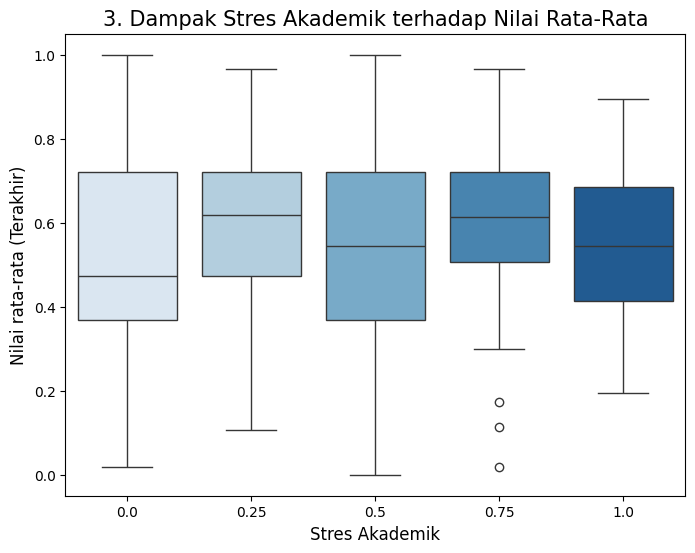

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran grafik
plt.figure(figsize=(8, 6))

# Membuat boxplot untuk menunjukkan distribusi nilai rata-rata berdasarkan tingkat Stres Akademik
sns.boxplot(x='Stres_Akademik', y='Nilai rata-rata (Terakhir)', data=df, palette='Blues')

# Menambahkan judul dan label sumbu
plt.title('3. Dampak Stres Akademik terhadap Nilai Rata-Rata', fontsize=15)
plt.xlabel('Stres Akademik', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)

# Menampilkan grafik
plt.show()


/tmp/ipython-input-3027617098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mood Saat Belajar', y='Rata rata nilai Siswa(nilai tarakhir)', data=df, palette='coolwarm')


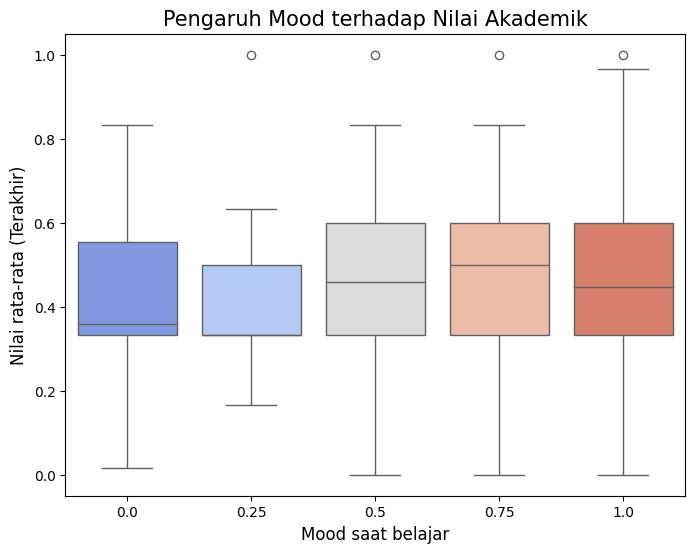

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(x='Mood Saat Belajar', y='Rata rata nilai Siswa(nilai tarakhir)', data=df, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Pengaruh Mood terhadap Nilai Akademik', fontsize=15)
plt.xlabel('Mood saat belajar', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)

# Menampilkan grafik
plt.show()


In [ ]:
# D. Korelasi Waktu Belajar Harian vs. Nilai Rata-Rata
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Waktu_Belajar_Harian', y='Rata rata nilai Siswa(nilai tarakhir)', data=df, alpha=0.6, color='darkorange')
plt.title('4. Korelasi Waktu Belajar Harian vs. Nilai Rata-Rata', fontsize=15)
plt.xlabel('Waktu Belajar Harian (Jam)', fontsize=12)
plt.ylabel('Nilai rata-rata (Terakhir)', fontsize=12)
plt.show()

korelasi = df['Waktu_Belajar_Harian'].corr(df['Nilai rata-rata (Terakhir)'])
print(f"\n--- Koefisien Korelasi Waktu Belajar Harian vs. Nilai: {korelasi:.3f} ---")
print("💡 Insight D: Mengukur kekuatan hubungan antara kuantitas waktu belajar dengan hasil akademik.")

ValueError: Could not interpret value `Waktu_Belajar_Harian` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>